# Customer personality Analysis

https://www.kaggle.com/imakash3011/customer-personality-analysis



Content  
Attributes  

People  

ID: Customer's unique identifier  
Year_Birth: Customer's birth year  
Education: Customer's education level  
Marital_Status: Customer's marital status  
Income: Customer's yearly household income  
Kidhome: Number of children in customer's household  
Teenhome: Number of teenagers in customer's household  
Dt_Customer: Date of customer's enrollment with the company  
Recency: Number of days since customer's last purchase  
Complain: 1 if customer complained in the last 2 years, 0 otherwise  
Products  
  
MntWines: Amount spent on wine in last 2 years  
MntFruits: Amount spent on fruits in last 2 years  
MntMeatProducts: Amount spent on meat in last 2 years  
MntFishProducts: Amount spent on fish in last 2 years  
MntSweetProducts: Amount spent on sweets in last 2 years  
MntGoldProds: Amount spent on gold in last 2 years  
Promotion  

NumDealsPurchases: Number of purchases made with a discount  
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise  
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise  
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise  
Place  
  
NumWebPurchases: Number of purchases made through the company’s web site  
NumCatalogPurchases: Number of purchases made using a catalogue  
NumStorePurchases: Number of purchases made directly in stores  
NumWebVisitsMonth: Number of visits to company’s web site in the last month  
Target  
Need to perform clustering to summarize customer segments.

## 비즈니스 시나리오

소비자 데이터를 이용해서 군집화를 실행,
어떤 소비자 군집이 소비를 많이 하는지 파악하여 그 소비자 군집에 맞는 브랜드 운영 실행

ㄴ> 군집화 결과에 따라서 소비를 많이 하는 군집이 나이대가 어떤지, 결혼은 했는지 수입은 어떤지, 결혼은 했는지 등등을 보기.


소비자 유형에 따른 소비 총액을 볼 수 있음  

1. 소비자 나이에 따른 소비 총액
2. 소비자의 교육 수준에 따른 소비 총액  
3. 소비자의 결혼 여부에 따른 소비 총액  
4. 결혼한 소비자 중 자식이 있는지 여부와, 자식의 나이대에 따른 소비 총액  



## 예상되는 결과

소비를 많이 한느 그룹이 도출이 되고 그에 따른 브랜드 방향을 이야기 할 수 있을 것으로 기대됨

# EDA

## 데이터 불러오기

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('C:\study\workspace_python\pdsample\datasets\mydata\marketing_campaign.csv', delimiter = '\t')

## 데이터 유형 확인 및 NULL 값 확인

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


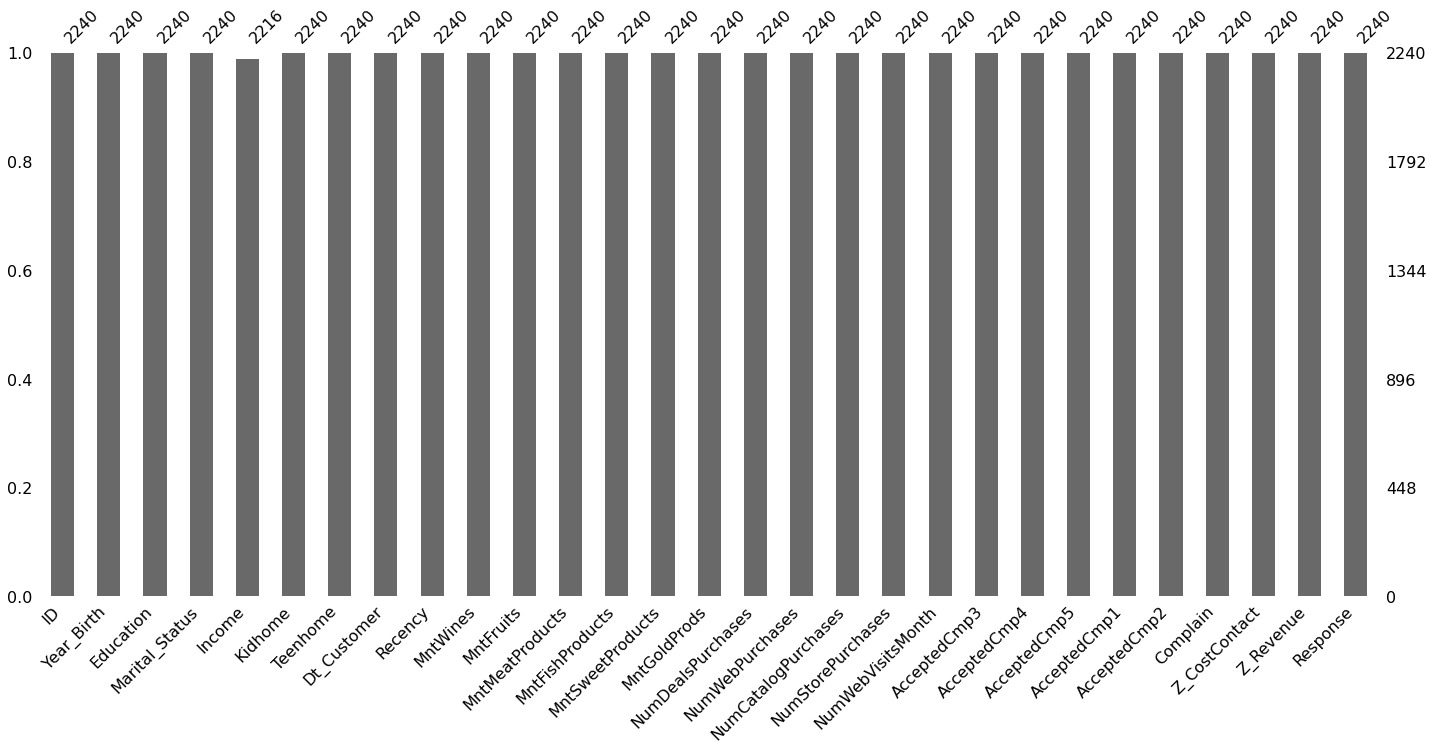

In [6]:
#각 칼럼 null 값 확인
#income 칼럼 널값 존재

import matplotlib.pyplot as plt
import missingno
plt.figure(figsize = (8,4))
missingno.bar(df)
# plt.savefig('missingno')
print(df.isnull().sum())

In [7]:
#null 값 row 삭제
df.dropna(inplace = True)

## 칼럼 확인

###  ID

In [8]:
#ID 칼럼 삭제

df.drop('ID', axis = 1, inplace = True)
df.drop(['Z_CostContact','Z_Revenue'], axis = 1, inplace = True)

###  Marital_Status

In [9]:
#Marital_Status 변환
df['Marital_Status'] = df['Marital_Status'].replace({'Together':'Partner','Married' : 'Partner', 'Divorced' : 'Single', 'Widow' : 'Single',
                             'Alone':'Single','Absurd': 'Single', 'YOLO' : 'Single'})

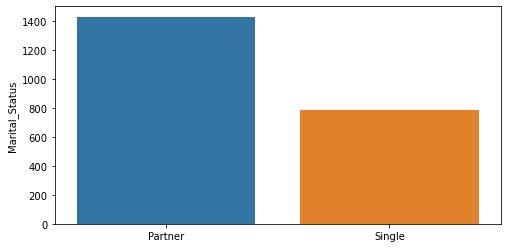

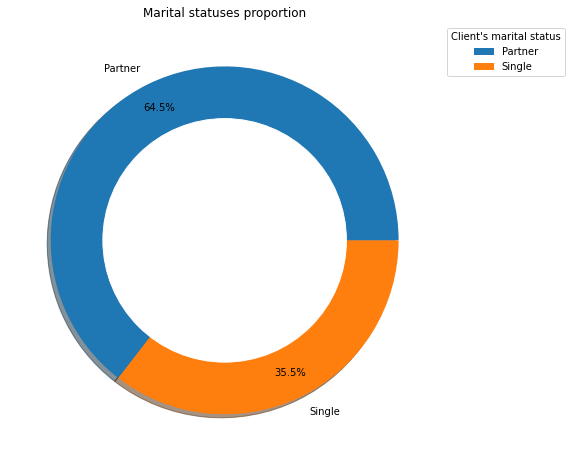

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#Marital_Status
plt.figure(figsize = (8,4))
sns.barplot(x = df['Marital_Status'].value_counts().index, y = df['Marital_Status'].value_counts())


sizes = dict(df['Marital_Status'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Marital statuses proportion")
plt.pie(sizes.values(), labels=sizes.keys(), autopct="%.1f%%", pctdistance=0.85, shadow=True)
plt.legend(title="Client's marital status", labels=sizes.keys(), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

### Dt_customer

In [11]:
#Dt_customer 변환
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])



### Year_Birth

In [12]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Partner,71613.0,0,0,2013-08-21,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Partner,26646.0,1,0,2014-10-02,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Partner,58293.0,1,0,2014-01-19,94,173,43,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Partner,61223.0,0,1,2013-06-13,46,709,43,...,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Partner,64014.0,2,1,2014-10-06,56,406,0,...,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,...,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Partner,69245.0,0,1,2014-01-24,8,428,30,...,5,10,3,0,0,0,0,0,0,0


In [13]:
#Year_Birth 칼럼 나이로 변환
df['Year_Birth'] = df['Year_Birth'].apply(lambda x : 2021 - x)

#Year_Birth 칼럼 이름 변경
df.rename(columns = {'Year_Birth' : 'Age'}, inplace = True)

C:\ca_da\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Count'>

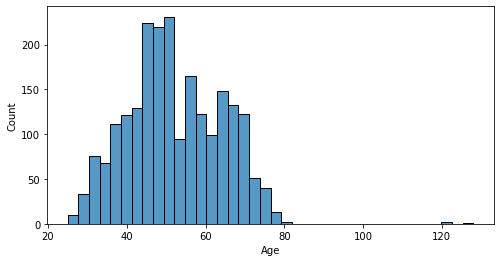

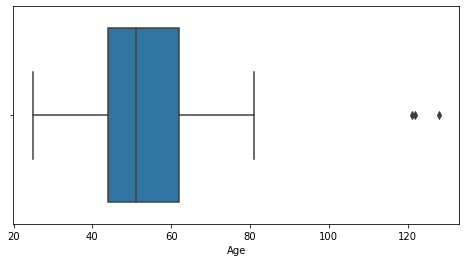

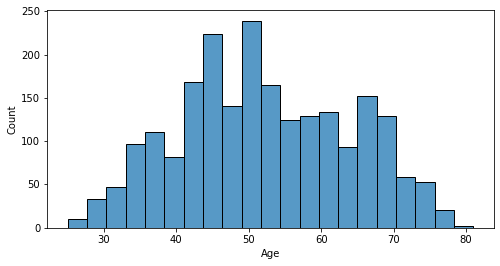

In [14]:
#Age 이상치 제거

plt.figure(figsize = (8,4))
sns.histplot(df['Age'])
plt.figure(figsize = (8,4))
sns.boxplot(df['Age'])

df[df['Age'] > 100].index
df = df.drop(df[df['Age'] > 100].index, axis = 0)

plt.figure(figsize = (8,4))
sns.histplot(df['Age'])

In [15]:
df.loc[(df['Age'] >= 13) & (df['Age'] <= 19), 'AgeGroup'] = 'Teen'
df.loc[(df['Age'] >= 20) & (df['Age']<= 39), 'AgeGroup'] = 'Adult'
df.loc[(df['Age'] >= 40) & (df['Age'] <= 59), 'AgeGroup'] = 'Middle Age Adult'
df.loc[(df['Age'] >= 60), 'AgeGroup'] = 'Senior Adult'


<AxesSubplot:xlabel='AgeGroup'>

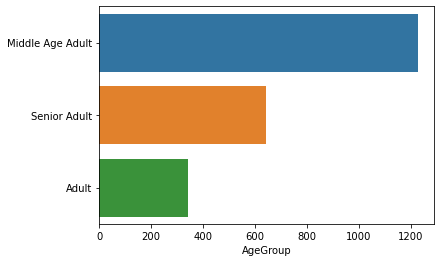

In [16]:
sns.barplot(y = df['AgeGroup'].value_counts().index, x =  df['AgeGroup'].value_counts())
# plt.savefig('AgeGroup')

### Income

C:\ca_da\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='Count'>

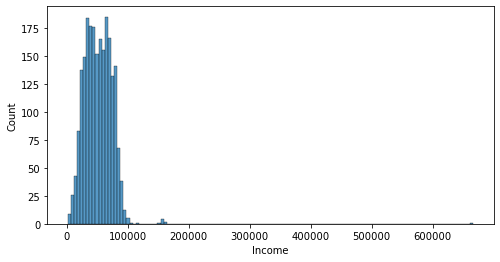

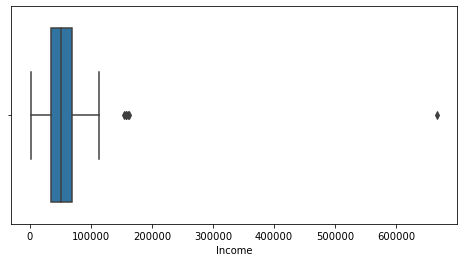

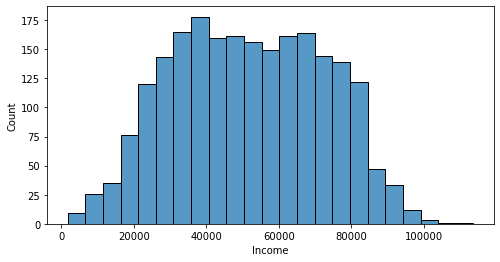

In [17]:
plt.figure(figsize = (8,4))
sns.histplot(df['Income'])
plt.figure(figsize = (8,4))
sns.boxplot(df['Income'])

df = df.drop(df[df['Income'] > 150000].index,axis = 0)

plt.figure(figsize = (8,4))
sns.histplot(df['Income'])

<AxesSubplot:xlabel='Marital_Status', ylabel='Income'>

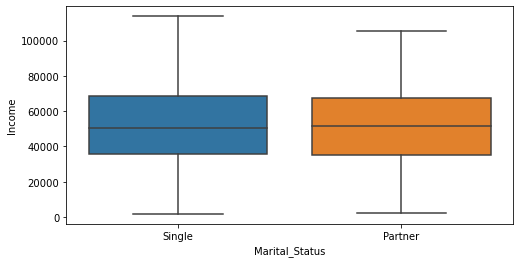

In [18]:
plt.figure(figsize = (8,4))
sns.boxplot(x = df['Marital_Status'], y = df['Income'])

<AxesSubplot:xlabel='AgeGroup', ylabel='Income'>

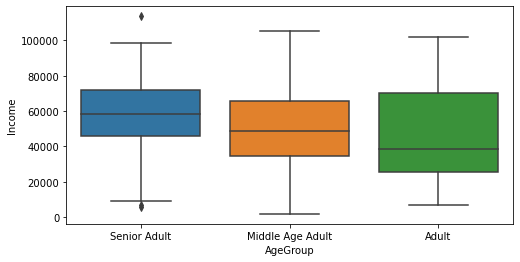

In [19]:
plt.figure(figsize = (8,4))
sns.boxplot(x = df['AgeGroup'], y = df['Income'])

### Education

{'Graduation': 1113, 'PhD': 476, 'Master': 364, '2n Cycle': 198, 'Basic': 54}

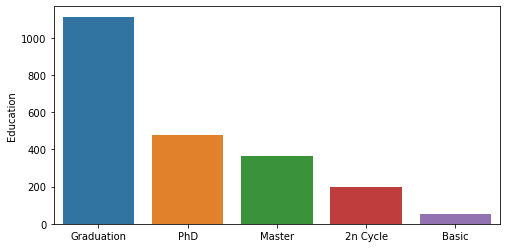

In [20]:
#Education
plt.figure(figsize = (8,4))
sns.barplot(x = df['Education'].value_counts().index, y = df['Education'].value_counts())
sizes = dict(df['Education'].value_counts())
sizes

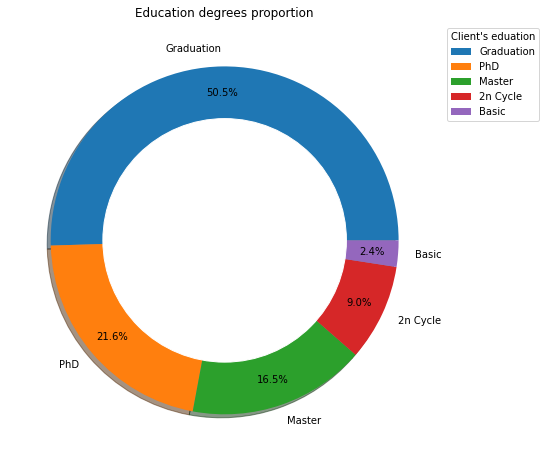

In [21]:
plt.figure(figsize=(12, 8))
plt.title("Education degrees proportion")
plt.pie(sizes.values(), labels=sizes.keys(), autopct="%.1f%%", pctdistance=0.85, shadow=True)
plt.legend(title="Client's eduation", labels=sizes.keys(), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

<AxesSubplot:title={'center':'Education - Income'}, xlabel='Education', ylabel='Income'>

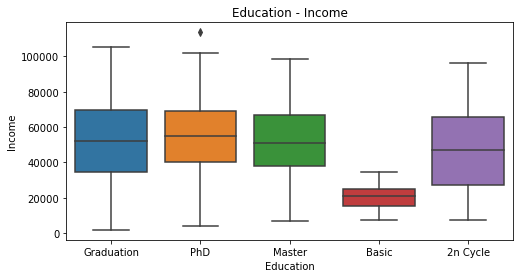

In [22]:
#교육수준별 수입

plt.figure(figsize = (8,4))
plt.title('Education - Income')
sns.boxplot(x = df['Education'], y = df['Income'])
# plt.savefig('Education_Spending')

<AxesSubplot:title={'center':'Education - AgeGroup count'}, xlabel='Education', ylabel='count'>

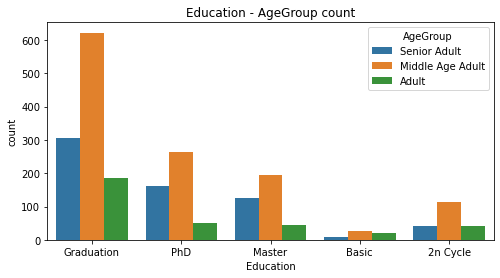

In [23]:

plt.figure(figsize = (8,4))
plt.title('Education - AgeGroup count')
sns.countplot(data = df, x = 'Education', hue = 'AgeGroup')

# plt.figure(figsize = (8,4))
# plt.title('AgeGroup - Education')
# sns.barplot(data = a, x = 'AgeGroup', y = 'Age', hue = 'Education')

### Kidhome and Teenhome

In [24]:
df['Kidhome'].value_counts()

0    1276
1     883
2      46
Name: Kidhome, dtype: int64

In [25]:
df['Teenhome'].value_counts()

0    1139
1    1015
2      51
Name: Teenhome, dtype: int64

In [26]:
df['NumChildren'] = df['Teenhome'] + df['Kidhome']
df.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,AgeGroup,NumChildren
0,64,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,7,0,0,0,0,0,0,1,Senior Adult,0
1,67,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,5,0,0,0,0,0,0,0,Senior Adult,2
2,56,Graduation,Partner,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,0,Middle Age Adult,0
3,37,Graduation,Partner,26646.0,1,0,2014-10-02,26,11,4,...,6,0,0,0,0,0,0,0,Adult,1
4,40,PhD,Partner,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,0,Middle Age Adult,1


In [27]:
df['HasChildren'] = df['NumChildren'].apply(lambda x : 1 if x > 0 else 0)

In [28]:
a = df['NumChildren'].value_counts().reset_index()
a.rename({'NumChildren' : 'values','index':'NumChildren'}, inplace = True, axis = 1)

<AxesSubplot:xlabel='NumChildren', ylabel='values'>

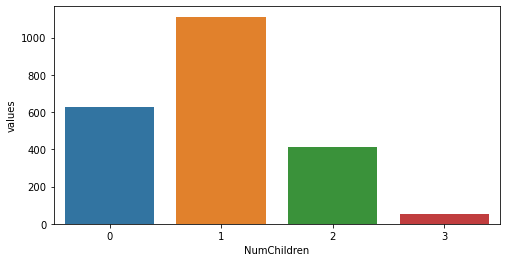

In [29]:
plt.figure(figsize = (8,4))
sns.barplot(data = a, x = 'NumChildren', y = 'values')

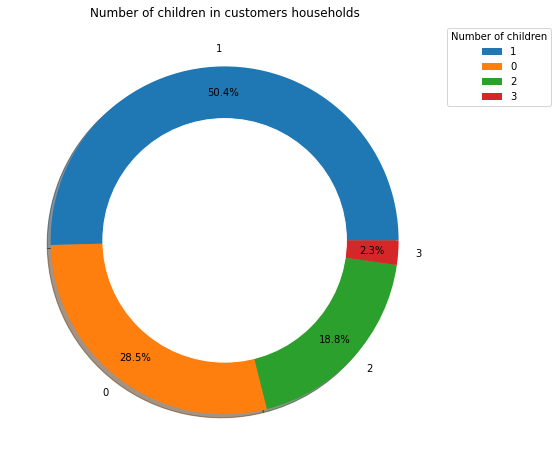

In [30]:
sizes = dict(df['NumChildren'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Number of children in customers households")
plt.pie(sizes.values(), labels=sizes.keys(), autopct="%.1f%%", pctdistance=0.85, shadow=True)
plt.legend(title="Number of children", labels=sizes.keys(), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

<AxesSubplot:xlabel='HasChildren', ylabel='Income'>

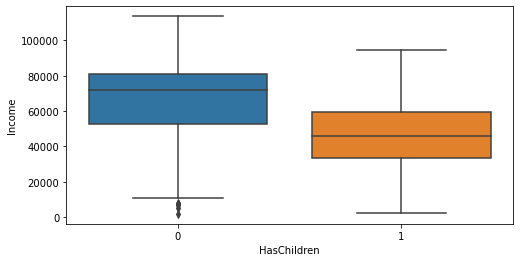

In [31]:
plt.figure(figsize= (8,4))
sns.boxplot(data = df, x = 'HasChildren', y = 'Income')

<AxesSubplot:title={'center':'HasChildren - AgeGroup count'}, xlabel='HasChildren', ylabel='count'>

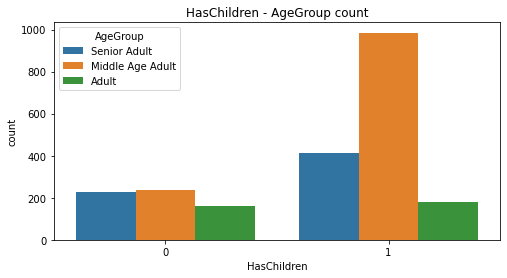

In [32]:
plt.figure(figsize = (8,4))
plt.title('HasChildren - AgeGroup count')
sns.countplot(data = df, x = 'HasChildren', hue = 'AgeGroup')

### Mnt

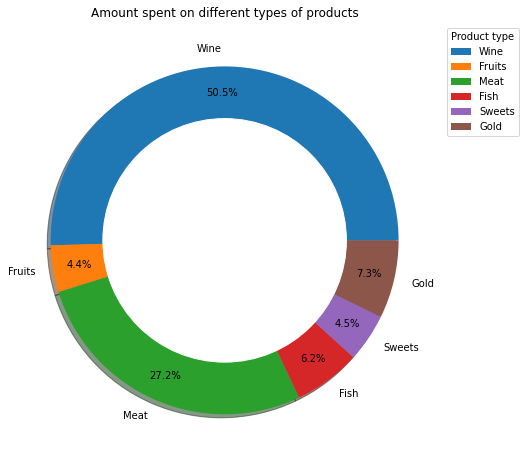

In [33]:
mnt = df.filter(like = 'Mnt').apply(lambda x : sum(x), axis = 0)
sizes = dict(mnt)


plt.figure(figsize=(12, 8))
plt.title("Amount spent on different types of products")
plt.pie(sizes.values(), labels=['Wine', 'Fruits', 'Meat','Fish', 'Sweets', 'Gold'], autopct="%.1f%%", pctdistance=0.85, shadow=True)
plt.legend(title="Product type", labels=['Wine', 'Fruits', 'Meat','Fish', 'Sweets', 'Gold'], bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

### Total spend

In [34]:
df['Total_spend'] = df.filter(like = 'Mnt').sum(axis = 1)
df.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,AgeGroup,NumChildren,HasChildren,Total_spend
0,64,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,0,0,0,0,0,1,Senior Adult,0,0,1617
1,67,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,0,0,0,0,0,0,Senior Adult,2,1,27
2,56,Graduation,Partner,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,Middle Age Adult,0,0,776
3,37,Graduation,Partner,26646.0,1,0,2014-10-02,26,11,4,...,0,0,0,0,0,0,Adult,1,1,53
4,40,PhD,Partner,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,Middle Age Adult,1,1,422


<AxesSubplot:title={'center':'Total_spend - HasChildren'}, xlabel='HasChildren', ylabel='Total_spend'>

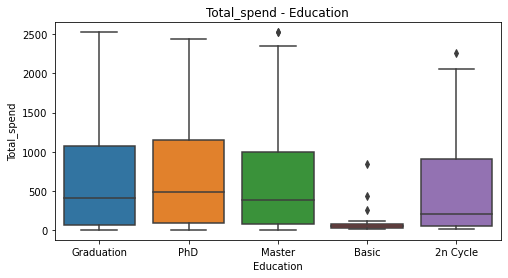

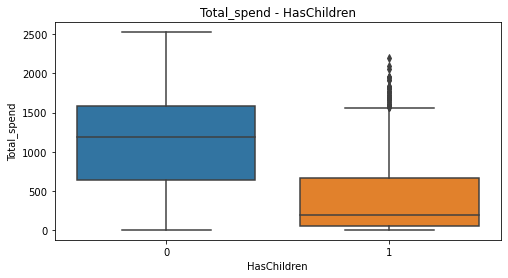

In [35]:
#Total_spend - Education
#Total_spend - HasChildren

plt.figure(figsize = (8,4))
plt.title('Total_spend - Education')
sns.boxplot(data = df, x = 'Education', y = 'Total_spend')

plt.figure(figsize = (8,4))
plt.title('Total_spend - HasChildren')
sns.boxplot(data = df, x = 'HasChildren', y = 'Total_spend')

### type of purchase

In [36]:
num = df.filter(regex='Num[^Deals].+Purchases').sum(axis=0)

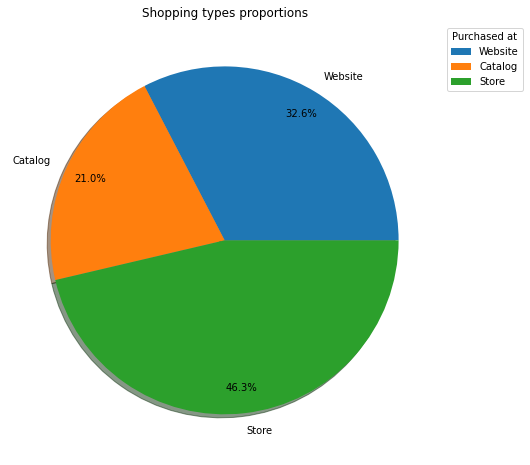

In [37]:
sizes = dict(num)

plt.figure(figsize=(12, 8))
plt.title("Shopping types proportions")
plt.pie(sizes.values(), labels=['Website', 'Catalog', 'Store'], autopct="%.1f%%", pctdistance=0.85, shadow=True)
plt.legend(title="Purchased at", labels=['Website', 'Catalog', 'Store'], bbox_to_anchor=(1, 1))

plt.show()

<AxesSubplot:title={'center':'NumWebVisitsMonth - Education'}, xlabel='Education', ylabel='NumWebVisitsMonth'>

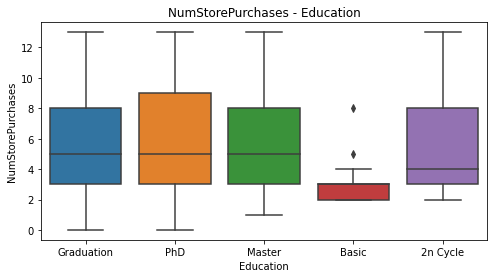

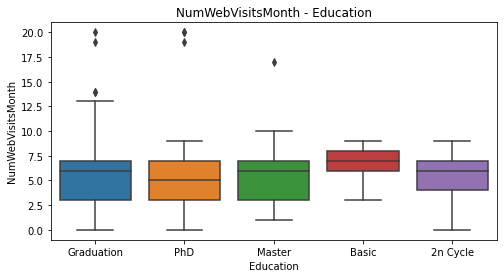

In [38]:
# 'NumStorePurchases', 'NumWebVisitsMonth'

plt.figure(figsize = (8,4))
plt.title('NumStorePurchases - Education')
sns.boxplot(data = df, x = 'Education', y = 'NumStorePurchases')

plt.figure(figsize = (8,4))
plt.title('NumWebVisitsMonth - Education')
sns.boxplot(data = df, x = 'Education', y = 'NumWebVisitsMonth')



<AxesSubplot:title={'center':'NumWebVisitsMonth - HasChildren'}, xlabel='HasChildren', ylabel='NumWebVisitsMonth'>

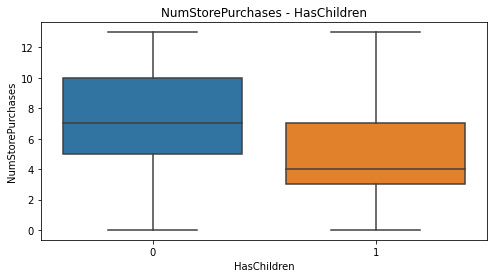

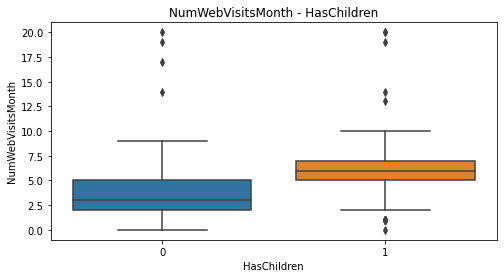

In [39]:
plt.figure(figsize = (8,4))
plt.title('NumStorePurchases - HasChildren')
sns.boxplot(data = df, x = 'HasChildren', y = 'NumStorePurchases')

plt.figure(figsize = (8,4))
plt.title('NumWebVisitsMonth - HasChildren')
sns.boxplot(data = df, x = 'HasChildren', y = 'NumWebVisitsMonth')


### cmp

In [40]:
# 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2'
df['TotalAcceptedCmp'] = df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2']
df['TotalAcceptedCmp'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [41]:
a = df['TotalAcceptedCmp'].value_counts().reset_index().rename({'TotalAcceptedCmp' : 'values','index':'TotalAcceptedCmp'}, axis =1)

<AxesSubplot:title={'center':'HasChildren - TotalAcceptedCmp'}, xlabel='HasChildren', ylabel='TotalAcceptedCmp'>

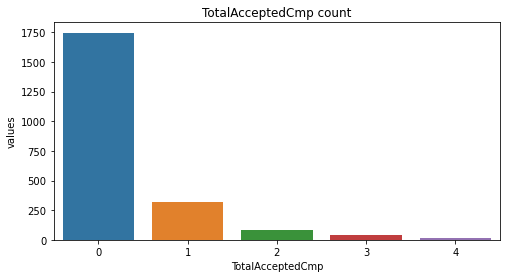

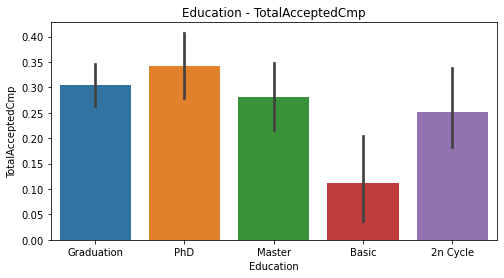

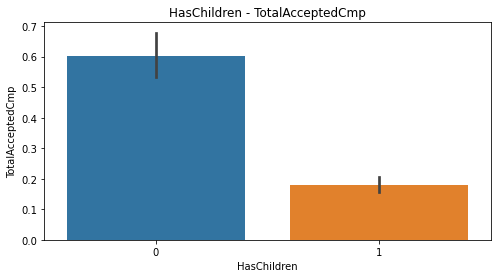

In [42]:
plt.figure(figsize = (8,4))
plt.title('TotalAcceptedCmp count')
sns.barplot(data = a, x = 'TotalAcceptedCmp', y = 'values')

plt.figure(figsize = (8,4))
plt.title('Education - TotalAcceptedCmp')
sns.barplot(data = df, x = 'Education', y = 'TotalAcceptedCmp')

plt.figure(figsize = (8,4))
plt.title('HasChildren - TotalAcceptedCmp')
sns.barplot(data = df, x = 'HasChildren', y = 'TotalAcceptedCmp')

<AxesSubplot:title={'center':'TotalAcceptedCmp - AgeGroup'}, xlabel='TotalAcceptedCmp', ylabel='count'>

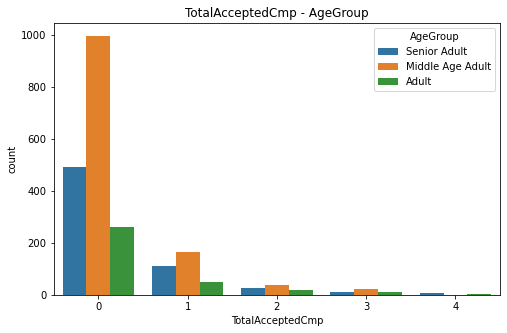

In [43]:
#이런건 지워야겠다.

plt.figure(figsize = (8,5))
plt.title('TotalAcceptedCmp - AgeGroup')
sns.countplot(data = df, x = 'TotalAcceptedCmp', hue = 'AgeGroup')

### 변수간 상관관계

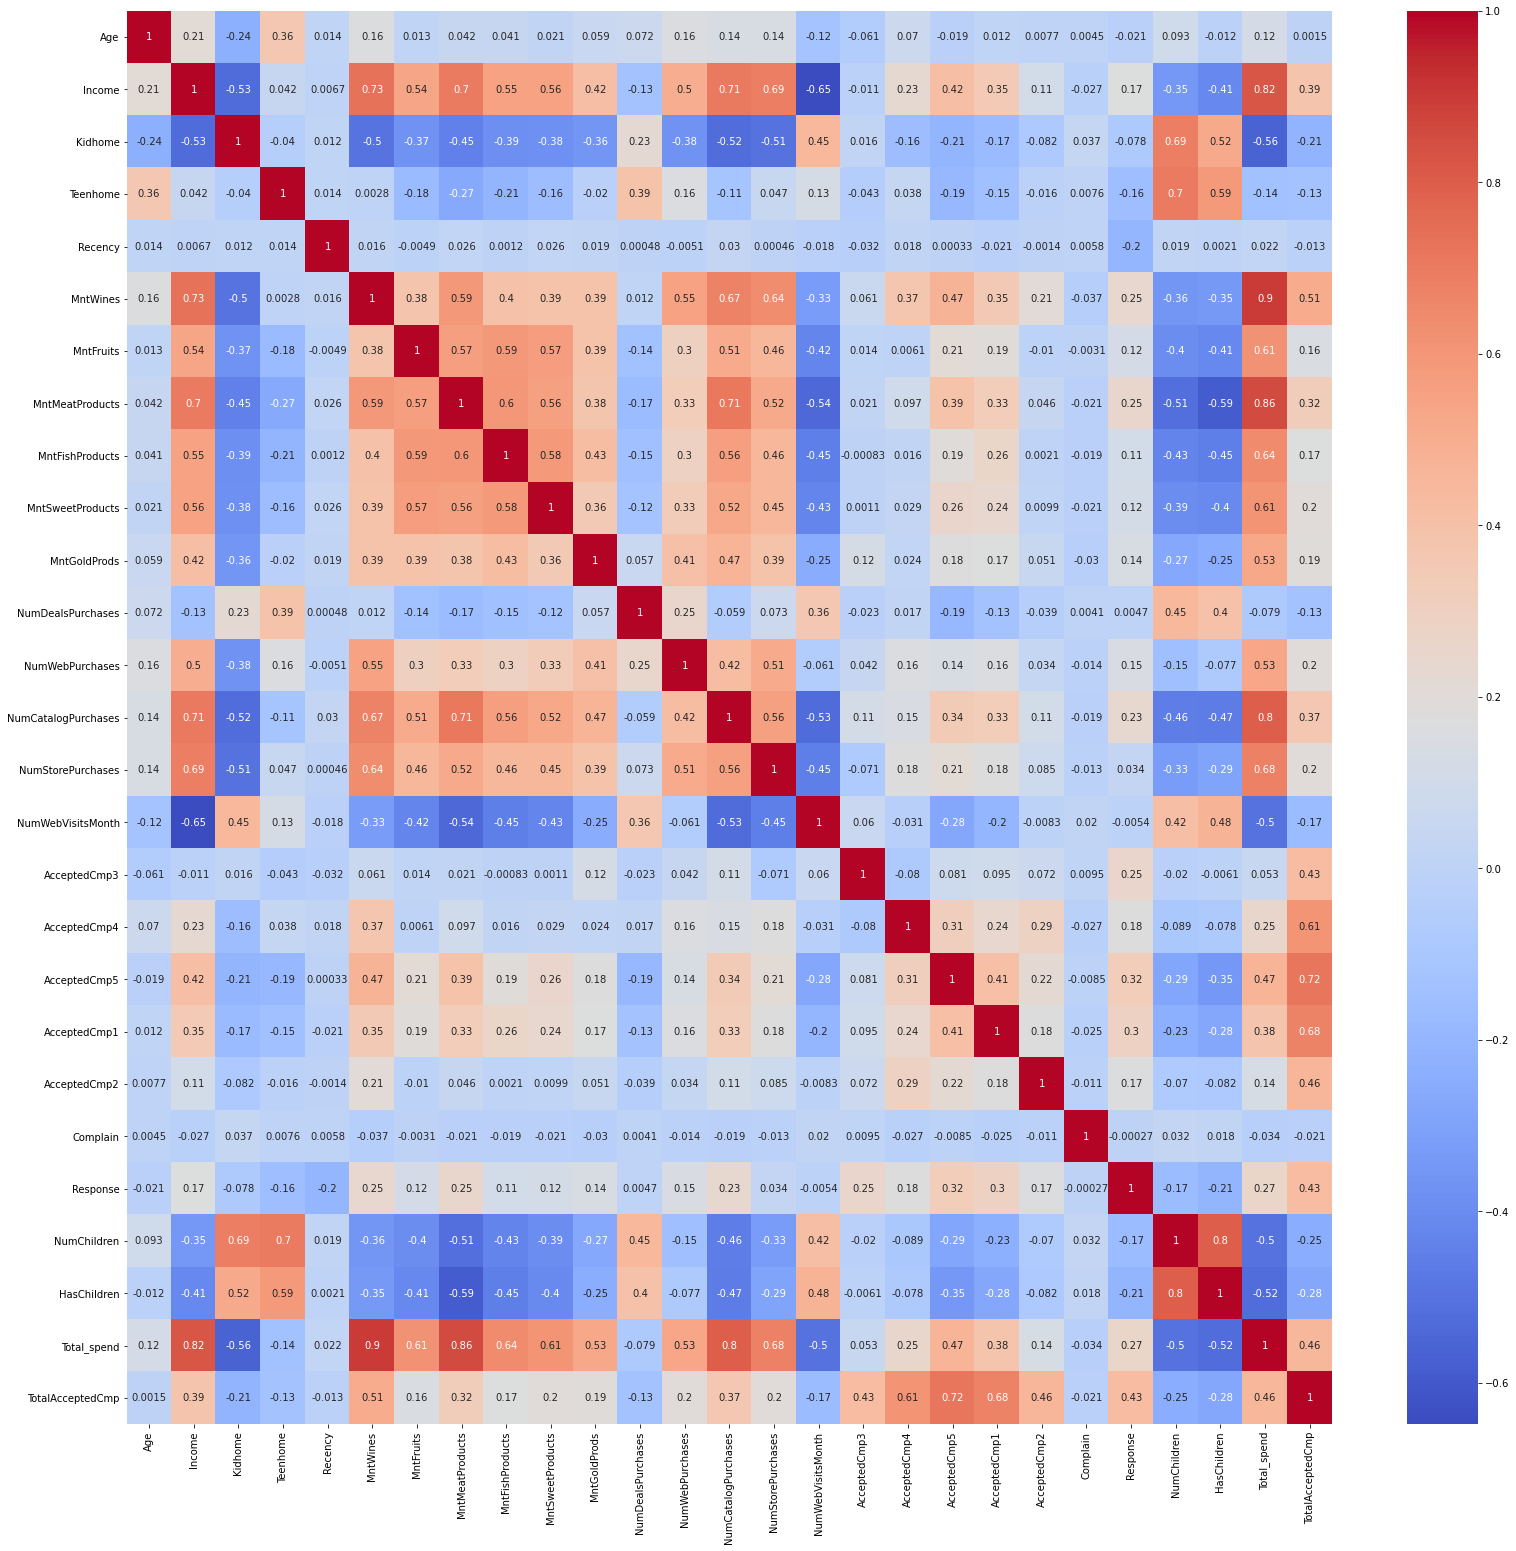

In [72]:
cor = df.corr()

plt.figure(figsize = (27,26))

sns.heatmap(cor,
           annot = True,
           cmap = 'coolwarm')

plt.show()

In [59]:
df_result = df.drop(['AgeGroup','Kidhome','Teenhome','AcceptedCmp5','AcceptedCmp4','AcceptedCmp3','AcceptedCmp2','AcceptedCmp1','Dt_Customer'], axis = 1)

In [45]:
df_result.head()

,Age,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,NumChildren,HasChildren,Total_spend,TotalAcceptedCmp
0,64,Graduation,Single,58138.0,58,635,88,546,172,88,...,0,0,0,0,0,1,0,0,1617,0
1,67,Graduation,Single,46344.0,38,11,1,6,2,1,...,0,0,0,0,0,0,2,1,27,0
2,56,Graduation,Partner,71613.0,26,426,49,127,111,21,...,0,0,0,0,0,0,0,0,776,0
3,37,Graduation,Partner,26646.0,26,11,4,20,10,3,...,0,0,0,0,0,0,1,1,53,0
4,40,PhD,Partner,58293.0,94,173,43,118,46,27,...,0,0,0,0,0,0,1,1,422,0


# Preprocessing

## 데이터 유형 변환

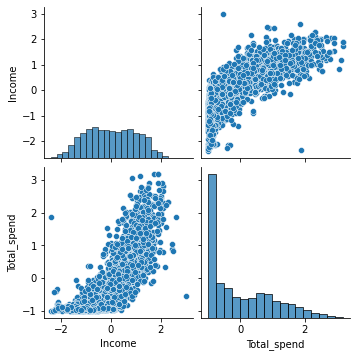

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_result[['Income','Total_spend']] = scaler.fit_transform(df_result[['Income','Total_spend']])
sns.pairplot(data = df_result[['Income','Total_spend']], kind = 'scatter')

In [63]:
from sklearn.preprocessing import LabelEncoder
lb_encoder = LabelEncoder()
df_result['Education'] = lb_encoder.fit_transform(df_result['Education'])

lb_encoder2 = LabelEncoder()
df_result['Marital_Status'] = lb_encoder2.fit_transform(df_result['Marital_Status'])


# 군집화

[0.5809195635823883,
 0.5255134230227515,
 0.5193529947402988,
 0.480190259738913,
 0.4711418146714359,
 0.466341554491779,
 0.4290976061925953]

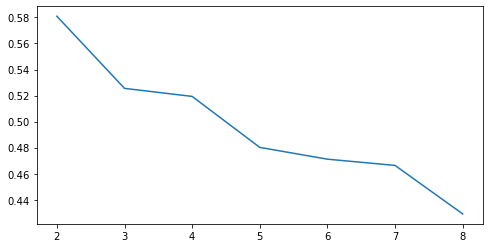

In [64]:
#최적 군집 개수 찾기

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


scores = []
for n in range(2,9):
    kmeans = KMeans(n_clusters = n, init = 'k-means++')
    kmeans.fit(df_result)
    
    scores.append(silhouette_score(df_result,kmeans.labels_))
    
plt.figure(figsize=(8,4))
sns.lineplot(y = scores, x = range(2,9))
scores

In [65]:
#최적 군집의 개수로 군집화 후에 군집화 결과 칼럼 생성
kmeans = KMeans(n_clusters = 2, init = 'k-means++')
kmeans.fit(df_result)
df_result['Cluster'] = kmeans.labels_ + 1

In [172]:
df_result

,Age,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,NumChildren,HasChildren,Total_spend,TotalAcceptedCmp,Cluster
0,64,2,1,0.314651,58,635,88,546,172,88,...,10,4,7,0,1,0,0,1.679323,0,2
1,67,2,1,-0.254877,38,11,1,6,2,1,...,1,2,5,0,0,2,1,-0.963897,0,1
2,56,2,0,0.965354,26,426,49,127,111,21,...,2,10,4,0,0,0,0,0.281242,0,1
3,37,2,0,-1.206087,26,11,4,20,10,3,...,0,4,6,0,0,1,1,-0.920675,0,1
4,40,4,0,0.322136,94,173,43,118,46,27,...,3,6,5,0,0,1,1,-0.307248,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,54,2,0,0.463624,46,709,43,182,42,118,...,3,4,5,0,0,1,1,1.220500,0,2
2236,75,4,0,0.598401,56,406,0,30,0,0,...,2,5,7,0,0,3,1,-0.270675,1,1
2237,40,2,1,0.258780,91,908,48,217,32,12,...,3,13,6,0,0,0,0,1.054260,1,2
2238,65,3,0,0.851004,8,428,30,214,80,30,...,5,10,3,0,0,1,1,0.392623,0,2


## PCA VISUALIZATION

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(df_result)
pca_transformed
pca_df = pd.DataFrame(data = pca_transformed, columns = ['ftr1','ftr2'])
pca_df['Cluster'] = kmeans.labels_ + 1
pca_df.head()
# df2 = df
# df2['ftr1'] = pca_transformed[:,0]
# df2['ftr2'] = pca_transformed[:,1]

,ftr1,ftr2,Cluster
0,480.078003,209.827945,2
1,-340.402207,-13.751096,1
2,95.460923,-77.427479,1
3,-333.543466,0.048923,1
4,-139.502249,21.644437,1


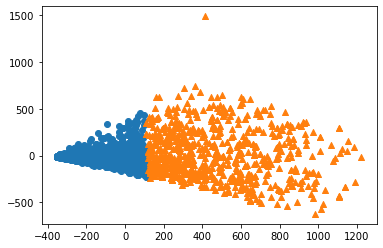

In [67]:
#pca 결과 시각화

cluster_1_ind = pca_df[pca_df['Cluster'] == 1].index
cluster_2_ind = pca_df[pca_df['Cluster'] == 2].index

plt.scatter(x = pca_df.loc[cluster_1_ind,'ftr1'], y=pca_df.loc[cluster_1_ind, 'ftr2'], marker ='o')
plt.scatter(x = pca_df.loc[cluster_2_ind,'ftr1'], y=pca_df.loc[cluster_2_ind, 'ftr2'], marker ='^')



In [68]:
print('Cluster 1 의 개수 {}'.format(len(df_result[df_result['Cluster'] == 1])))
print('Cluster 2 의 개수 {}'.format(len(df_result[df_result['Cluster'] == 2])))

Cluster 1 의 개수 1473
Cluster 2 의 개수 732


# 그룹화 결과 insight 시각화

In [78]:
df['Cluster'] = kmeans.labels_ + 1

In [82]:
df_insight = df
df_insight

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,AgeGroup,NumChildren,HasChildren,Total_spend,TotalAcceptedCmp,Cluster
0,64,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,0,0,0,1,Senior Adult,0,0,1617,0,2
1,67,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,0,0,0,0,Senior Adult,2,1,27,0,1
2,56,Graduation,Partner,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,Middle Age Adult,0,0,776,0,1
3,37,Graduation,Partner,26646.0,1,0,2014-10-02,26,11,4,...,0,0,0,0,Adult,1,1,53,0,1
4,40,PhD,Partner,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,Middle Age Adult,1,1,422,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,54,Graduation,Partner,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,Middle Age Adult,1,1,1341,0,2
2236,75,PhD,Partner,64014.0,2,1,2014-10-06,56,406,0,...,1,0,0,0,Senior Adult,3,1,444,1,1
2237,40,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,...,0,0,0,0,Middle Age Adult,0,0,1241,1,2
2238,65,Master,Partner,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,Senior Adult,1,1,843,0,2


In [173]:
df_insight['Cluster'].value_counts()

1    1473
2     732
Name: Cluster, dtype: int64

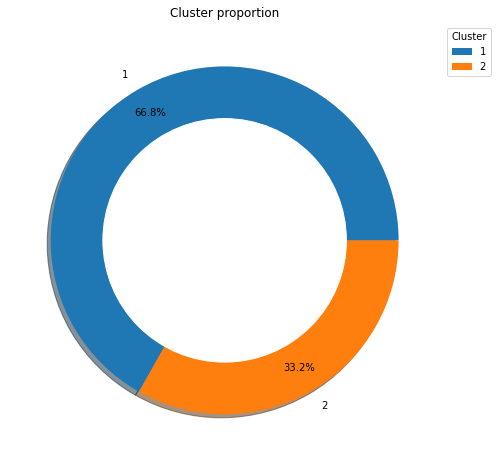

<AxesSubplot:ylabel='Cluster'>

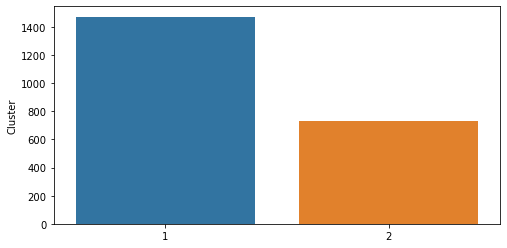

In [86]:
sizes = dict(df_insight['Cluster'].value_counts())
plt.figure(figsize=(12, 8))
plt.title("Cluster proportion")
plt.pie(sizes.values(), labels = sizes.keys(), autopct="%.1f%%", pctdistance=0.85, shadow = True)
plt.legend(title="Cluster", labels=sizes.keys(), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

plt.figure(figsize = (8,4))
sns.barplot(x = df_insight['Cluster'].value_counts().index, y = df_insight['Cluster'].value_counts())

## Cluster - income

- 그룹 1번과 그룹 2번의 수입을 비교했을 때, 그룹 2번의 수입이 더 높다.
- 그룹 2번이 숫자가 더 적음에도 수입이 높다.

<AxesSubplot:xlabel='Cluster', ylabel='Income'>

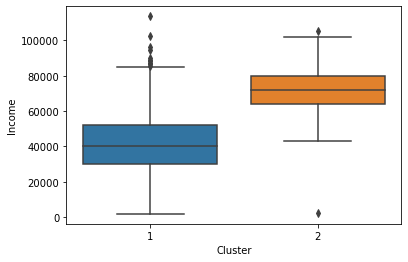

In [87]:
#숫자가 더 적은 그룹2가 수입이 더 높다.

sns.boxplot(data = df_insight, x = 'Cluster', y = 'Income')

## Cluster - Education

- 그룹 1번이 그룹 2번보다 숫자가 많아서 그런지, 모든 교육과정에서 그룹 2번보다 도수가 높다.

<AxesSubplot:xlabel='Education', ylabel='count'>

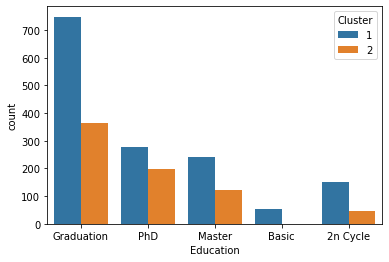

In [88]:
#이것도 의미가 없는 거 같음

sns.countplot(data=df_insight, x='Education', hue='Cluster')

## Cluster - NumChildren(HasChildren)

- 아이가 없는 사람은 그룹 2번이 그룹 1번보다 더 많다.
- 아이가 있는 경우에는 그룹 1번이 그룹 2번보다 월등히 많다.

<AxesSubplot:title={'center':'Cluster - HasChildren'}, xlabel='HasChildren', ylabel='count'>

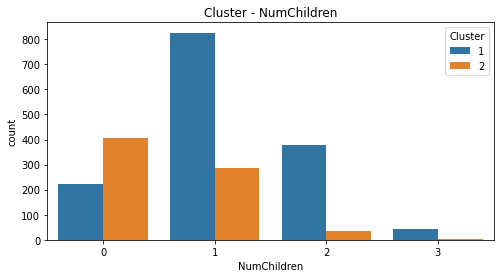

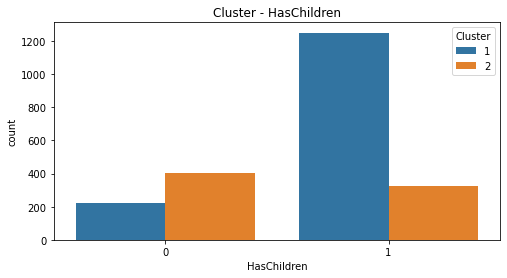

In [95]:
plt.figure(figsize = (8,4))
plt.title('Cluster - NumChildren')
sns.countplot(data=df_insight, x='NumChildren', hue='Cluster')

plt.figure(figsize = (8,4))
plt.title('Cluster - HasChildren')
sns.countplot(data = df_insight, x = 'HasChildren', hue = 'Cluster')

## Cluster - NumStorePurchases or NumWebVisitsMonth

- 그룹 2번이 store에 방문해서 상품을 구매한 건수가 그룹 1번보다 더 많다.
- 그룹 1번이 web 에서 상품을 구매한 건수가 그룹 2번보다 더 많다.

<AxesSubplot:title={'center':'NumWebVisitsMonth - Cluster'}, xlabel='Cluster', ylabel='NumWebVisitsMonth'>

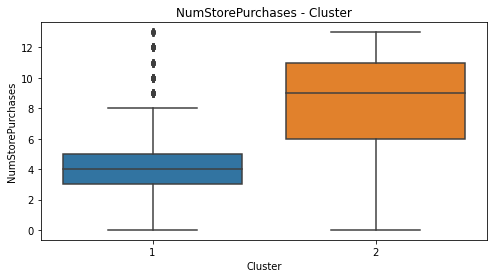

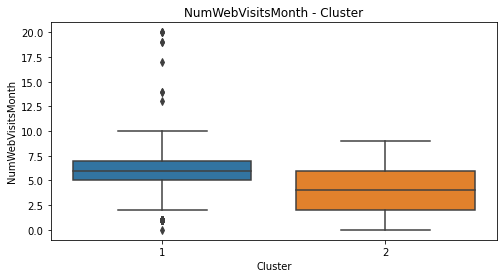

In [96]:
# 'NumStorePurchases', 'NumWebVisitsMonth'

plt.figure(figsize = (8,4))
plt.title('NumStorePurchases - Cluster')
sns.boxplot(data = df_insight, x = 'Cluster', y = 'NumStorePurchases')

plt.figure(figsize = (8,4))
plt.title('NumWebVisitsMonth - Cluster')
sns.boxplot(data = df_insight, x = 'Cluster', y = 'NumWebVisitsMonth')


- 캠페인 받아들인 토탈수랑 매장방문 상관관계

## Cluster - CMP (%)

- 그룹 2번이 그룹 1번보다 CMP 을 받아들인 % 가 높음

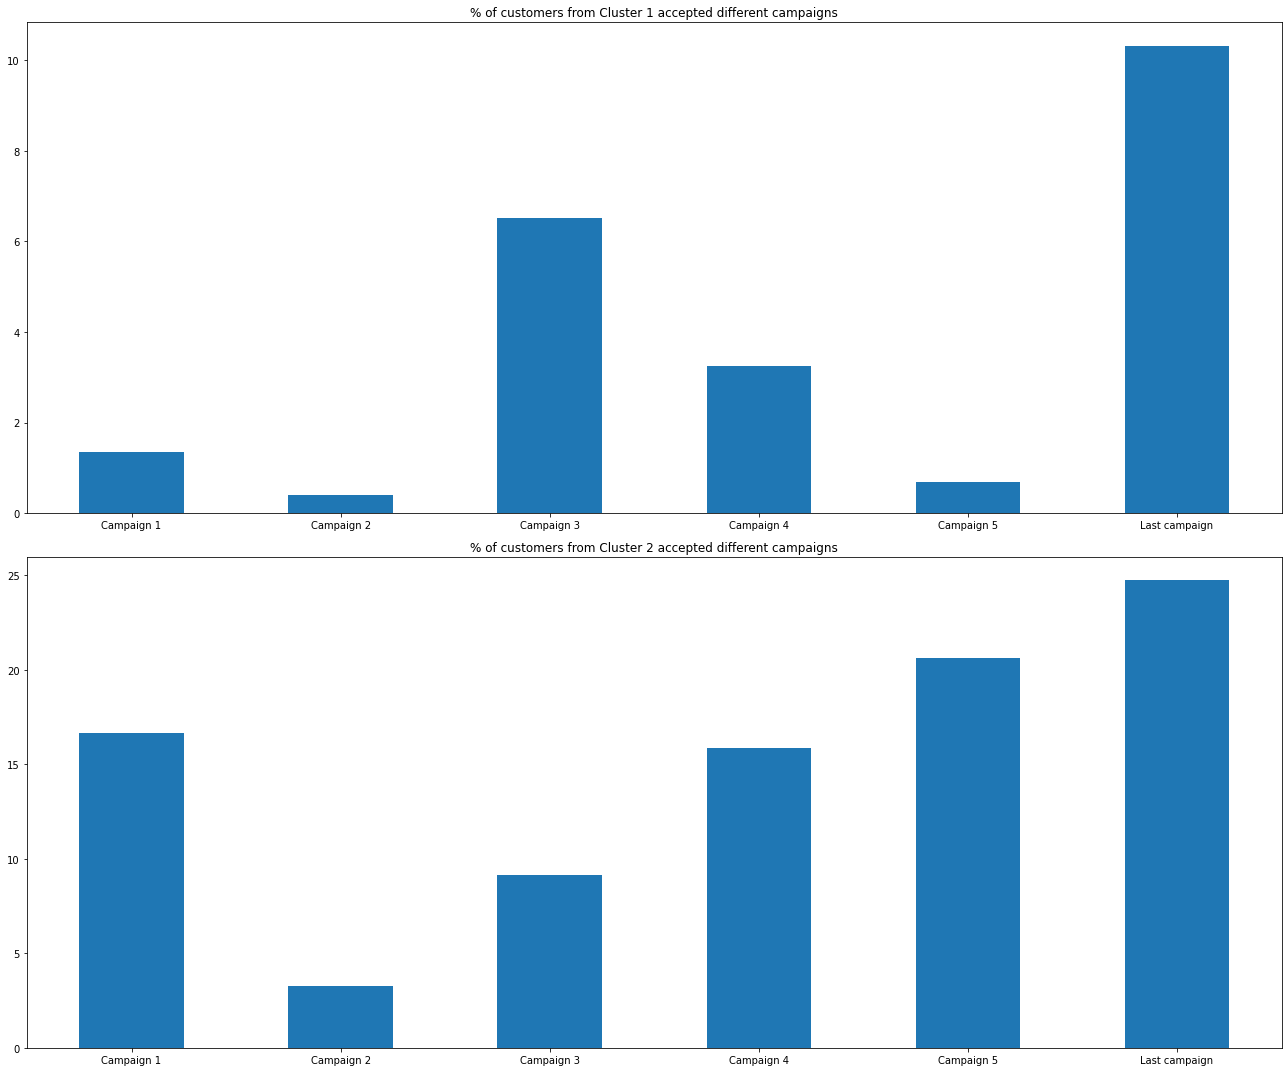

In [120]:
fig, axes = plt.subplots(2, 1, figsize=(8, 4))

for i in range(1, 3):
    ax = (df_insight.query(f'Cluster == {i}')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]
          .sum() 
          .divide(df_insight.query(f'Cluster == {i}').shape[0]).multiply(100)
          .plot(kind='bar', figsize=(18,15), title=f'% of customers from Cluster {i} accepted different campaigns', ax=axes[i-1]))
    ax.set_xticklabels(['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Last campaign'], rotation=0)
    
plt.tight_layout()

## Cluster - Complain

- 그룹 1번이 그룹 2번보다 Complain 을 많이 함

<AxesSubplot:title={'center':'Cluster - Complain'}, xlabel='Cluster', ylabel='count'>

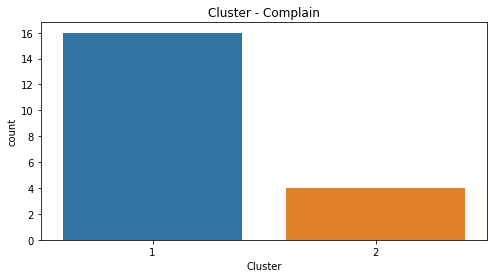

In [135]:
df_insight[df_insight['Complain'] == 1]
plt.figure(figsize = (8,4))
plt.title('Cluster - Complain')
sns.countplot(data = df_insight[df_insight['Complain'] == 1], x = 'Cluster')

## Cluster - AgeGroup

- 그룹 1, 2 모두 Middle Age Adult > Senior Adult > Adult 순으로 나이대가 구성됨

<AxesSubplot:xlabel='Cluster', ylabel='count'>

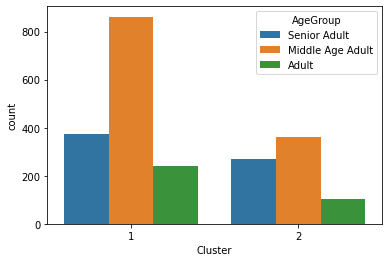

In [142]:
df_insight
sns.countplot(data = df_insight, x = 'Cluster', hue = 'AgeGroup')

In [145]:
df_insight.columns

Index(['Age', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'AgeGroup', 'NumChildren', 'HasChildren',
       'Total_spend', 'TotalAcceptedCmp', 'Cluster'],
      dtype='object')

## Cluster - Mnt

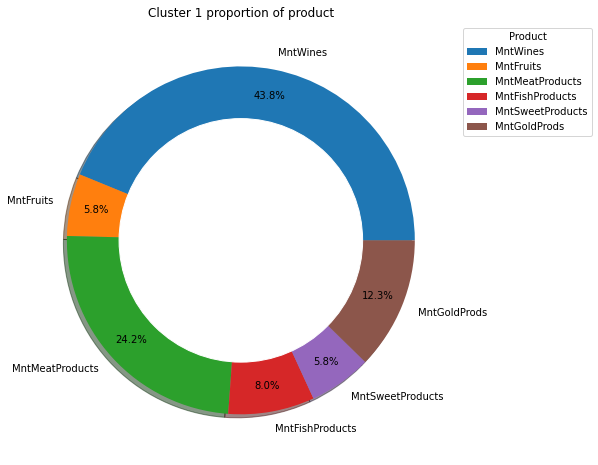

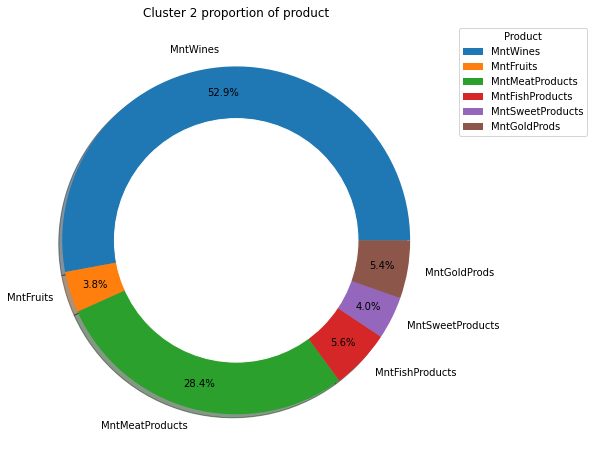

In [171]:
sizes = dict(df_insight.query('Cluster == 1')[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum().divide(df_insight.query('Cluster == 1')['Total_spend'].sum()).multiply(100))

plt.figure(figsize=(12, 8))
plt.title("Cluster 1 proportion of product")
plt.pie(sizes.values(), labels=sizes.keys(), autopct="%.1f%%", pctdistance=0.85, shadow=True)
plt.legend(title="Product", labels=sizes.keys(), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

sizes = dict(df_insight.query('Cluster == 2')[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum().divide(df_insight.query('Cluster == 2')['Total_spend'].sum()).multiply(100))

plt.figure(figsize=(12, 8))
plt.title("Cluster 2 proportion of product")
plt.pie(sizes.values(), labels=sizes.keys(), autopct="%.1f%%", pctdistance=0.85, shadow=True)
plt.legend(title="Product", labels=sizes.keys(), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

## Cluster - Total_spend

- 그룹 2번이 소비를 한 건수가 그룹 1번보다 더 많음

In [175]:
df_insight.groupby(['Cluster'])[['Total_spend']].sum()

,Total_spend
Cluster,
1,362143
2,975899


<AxesSubplot:title={'center':'Cluster - Total_spend'}, xlabel='Cluster', ylabel='Total_spend'>

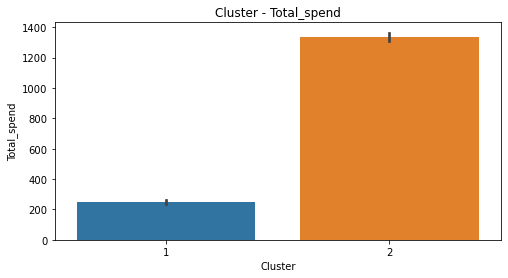

In [140]:
plt.figure(figsize = (8,4))
plt.title('Cluster - Total_spend')
sns.barplot(data = df_insight, x = 'Cluster', y = 'Total_spend')

1. cluster 1에 보완을 하면서 서비스를 개선하는 방향 (집단 1의 소비를 늘릴 수 있는 방법)

- insight1
- 그룹 1은 매장방문이 적고 웹사이트가 많으면서 캠페인 참여가 적다, 그룹 2는 매장방문이 많고 웹사이트가 방문이 적은데 캠페인 참여가 많다.
- 온라인 웹사이트에 캠페인 유도 팝업창을 만들어 그룹1의 캠페인 참여율을 높인다.
- 그룹1은 온라인 구매율이 더 높은데, 온라인 구매를 할 때 할인을 해주는 쿠폰 등을 발급해주어 구매율을 높인다.
-  
- insight2
- store를 방문할시, 아이를 위한 시설을 두어 편하게 쇼핑할 수 있도록 만들어 그룹 1의 매장 방문 횟수를 늘린다. (매장방문 - 소비총량 양의 상관관계 높음)






2. cluster 2에 맞춰 서비스를 더욱 강화 (집단 2 : 기존의 좋은 것들을 계속 개선)
- 

# 여기까지 일단 따라함

In [136]:
df_insight

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,AgeGroup,NumChildren,HasChildren,Total_spend,TotalAcceptedCmp,Cluster
0,64,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,0,0,0,1,Senior Adult,0,0,1617,0,2
1,67,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,0,0,0,0,Senior Adult,2,1,27,0,1
2,56,Graduation,Partner,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,Middle Age Adult,0,0,776,0,1
3,37,Graduation,Partner,26646.0,1,0,2014-10-02,26,11,4,...,0,0,0,0,Adult,1,1,53,0,1
4,40,PhD,Partner,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,Middle Age Adult,1,1,422,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,54,Graduation,Partner,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,Middle Age Adult,1,1,1341,0,2
2236,75,PhD,Partner,64014.0,2,1,2014-10-06,56,406,0,...,1,0,0,0,Senior Adult,3,1,444,1,1
2237,40,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,...,0,0,0,0,Middle Age Adult,0,0,1241,1,2
2238,65,Master,Partner,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,Senior Adult,1,1,843,0,2
